### Exercise 8: Strong Convergence EM

In [15]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)

gamma=2; mu=1; Xzero=1
T=1; N=2**9; dt = float(T)/N
M=1000

In [16]:
def xrange(x):
    return iter(range(x))

Xerr=np.zeros((M,5))
for s in xrange(M):
    dW=np.sqrt(dt)*np.random.randn(1,N)
    W=np.cumsum(dW)
    Xtrue = Xzero*np.exp((gamma-0.5*mu**2)*T+mu*W[-1])
    for p in range(5):
        R=2**p; Dt=R*dt; L=N/R
        Xem=Xzero
        for j in xrange(int(L)+1):
            Winc=np.sum(dW[0][range(R*(j-1),R*j)])
            Xem += Dt*gamma*Xem + mu*Xem*Winc
        Xerr[s,p]=np.abs(Xem-Xtrue)

Text(0.5, 1.0, 'emstrong.py')

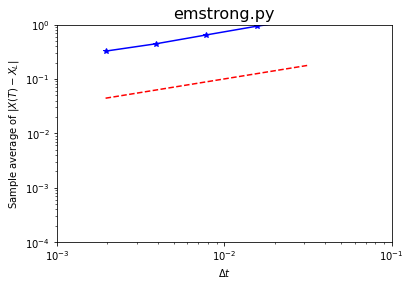

In [17]:
Dtvals=dt*(np.power(2,range(5)))
plt.loglog(Dtvals,np.mean(Xerr,0),'b*-')
plt.loglog(Dtvals,np.power(Dtvals,0.5),'r--')
plt.axis([1e-3, 1e-1, 1e-4, 1])
plt.xlabel('$\Delta t$'); plt.ylabel('Sample average of $|X(T)-X_L|$')
plt.title('emstrong.py',fontsize=16)

In [18]:
### Least squares fit of error = C * Dt^q ###
A = np.column_stack((np.ones((5,1)), np.log(Dtvals))); rhs=np.log(np.mean(Xerr,0))
sol = np.linalg.lstsq(A,rhs,rcond=None)[0]; q=sol[1]
resid=np.linalg.norm(np.dot(A,sol) - rhs)
print('q = ', q)
print ("residual = ", resid) 


q =  0.4982397409413089
residual =  0.044171893974402916
